In [2]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
data = tf.keras.preprocessing.image_dataset_from_directory(
"Citrus_dataset - Copie", 
    shuffle =True ,
    image_size=(256,256),
    batch_size = 32  
)

Found 4533 files belonging to 6 classes.


In [3]:
class_name=data.class_names

In [4]:
class_name

['Black spot', 'Canker', 'Greening', 'Melanose', 'Scab', 'healthy']

In [5]:
len(data)

142

(32, 256, 256, 3)


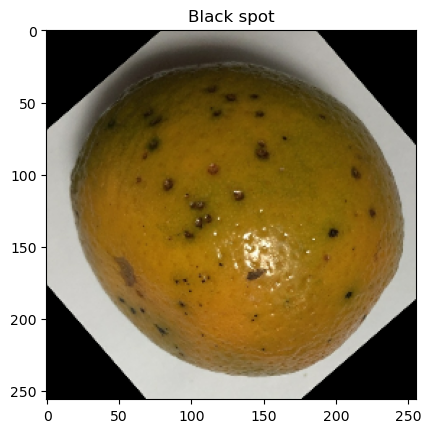

In [6]:
for image_batch , label_batch in data.take(1) : 
    print(image_batch.shape)
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])

In [7]:
epochs=20 
train_size=0.8
val_size = 0.1 
test_size= 0.1 

In [8]:
def get_dataset_partitions_tf (ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000) : 
    ds_size = len(ds)
    if shuffle : 
        ds = ds.shuffle(shuffle_size , seed=12)
    nb_training_samples = train_split * ds_size
    train_data = data.take(int(nb_training_samples))
    test_ds = data.skip(int(nb_training_samples))
    nb_validation_samples = val_split * ds_size
    valid_ds = data.take(int(nb_validation_samples))
    test_ds = test_ds.skip(int(nb_validation_samples))
    return train_data , valid_ds , test_ds 

In [9]:
train_data , valid_ds , test_ds = get_dataset_partitions_tf(data)

In [10]:
print (len(train_data),len(valid_ds),len(test_ds))

113 14 15


In [11]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [13]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
input_shape = (32, 256, 256, 3)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [15]:
model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [17]:
model.compile(
    optimizer= 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history=model.fit(train_data,epochs=epochs,batch_size=32,verbose=1,validation_data=valid_ds)

Epoch 1/20
113/113 [==============================] - 138s 1s/step - loss: 0.9212 - accuracy: 0.5711 - val_loss: 0.6449 - val_accuracy: 0.7143
Epoch 2/20
113/113 [==============================] - 122s 1s/step - loss: 0.5610 - accuracy: 0.7580 - val_loss: 0.4296 - val_accuracy: 0.8348
Epoch 3/20
113/113 [==============================] - 129s 1s/step - loss: 0.4213 - accuracy: 0.8355 - val_loss: 0.4539 - val_accuracy: 0.8058
Epoch 4/20
113/113 [==============================] - 132s 1s/step - loss: 0.3675 - accuracy: 0.8462 - val_loss: 0.3318 - val_accuracy: 0.8795
Epoch 5/20
113/113 [==============================] - 295s 3s/step - loss: 0.3048 - accuracy: 0.8764 - val_loss: 0.3017 - val_accuracy: 0.8929
Epoch 6/20
113/113 [==============================] - 116s 1s/step - loss: 0.2494 - accuracy: 0.8996 - val_loss: 0.2249 - val_accuracy: 0.9241
Epoch 7/20
113/113 [==============================] - 116s 1s/step - loss: 0.2193 - accuracy: 0.9170 - val_loss: 0.1863 - val_accuracy: 0.9286

In [19]:
model.evaluate(test_ds)

15/15 [==============================] - 7s 203ms/step - loss: 0.4524 - accuracy: 0.8977


[0.4524361789226532, 0.8976545929908752]

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 113}

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

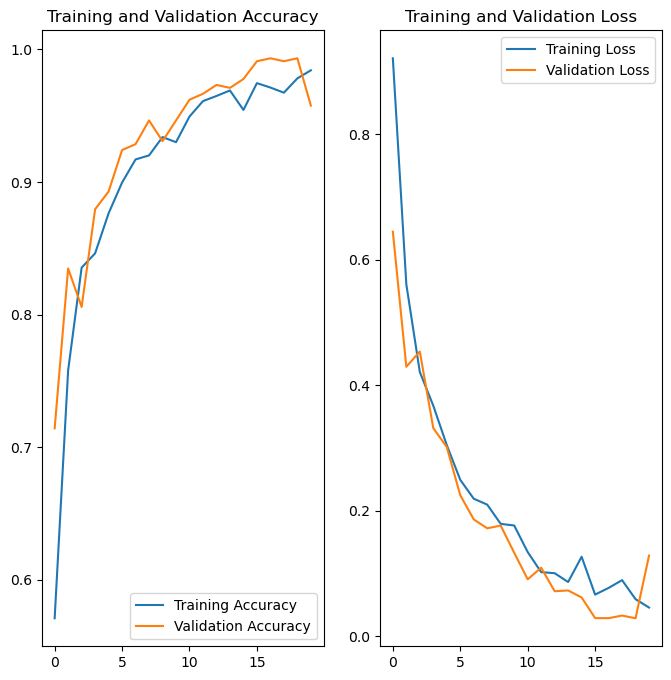

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Canker
1/1 [==============================] - 0s 298ms/step
predicted label: Black spot


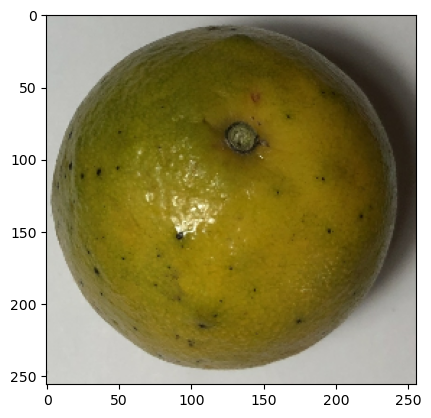

In [23]:
for images_batch , labels_batch in test_ds.take(1) : 
    first_image = image_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1]
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


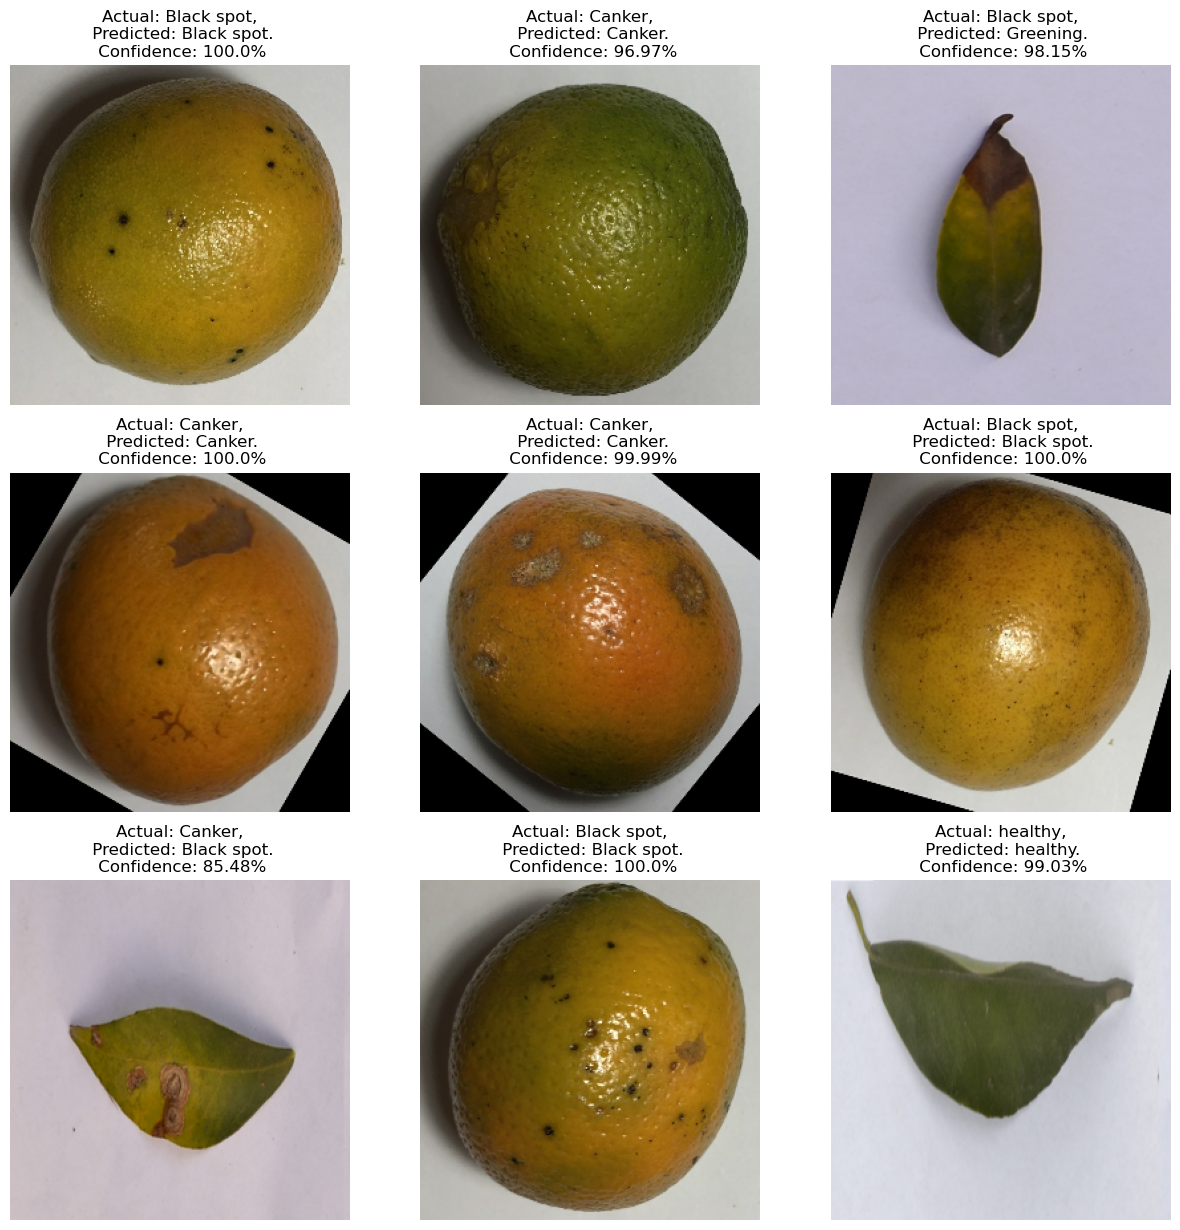

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [26]:
model_version= 1 
model.save(f"C:/Users/MSI/Desktop/Citrus_disease/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/MSI/Desktop/Citrus_disease/models/1\assets


INFO:tensorflow:Assets written to: C:/Users/MSI/Desktop/Citrus_disease/models/1\assets


# Post Training Quantization


In [10]:
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/MSI/Desktop/Citrus_disease/models/1")
tflite_model = converter.convert()

In [11]:
len(tflite_model)

742604

In [12]:
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/MSI/Desktop/Citrus_disease/models/1")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [13]:
len(tflite_quant_model)

199792

In [14]:
with open("tflite_quant_model.tflite","wb") as f : 
    f.write(tflite_quant_model)